#PROJECT1_STUDENT.CSV FILE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#import csv file
data = pd.read_csv("/content/sample_data/student.csv.zip")
print(data.shape)
data.head()

(6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:
#finding null values
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
#filling null values
data.fillna(method = "ffill",inplace = True)
print(data.shape)
data.isnull().sum()

(6607, 20)


<ipython-input-7-e63f716adcd6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method = "ffill",inplace = True)


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


#1)How does the number of hours studied per week correlate with the final exam score?

In [ ]:
#1)How does the number of hours studied per week correlate with the final exam score?
df = data[['Hours_Studied','Exam_Score']].corr()
df1 = df
df1


,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.445455
Exam_Score,0.445455,1.000000


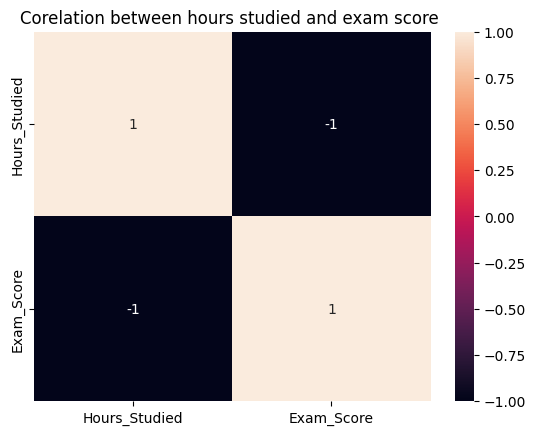

In [ ]:
# Plotting correlation heatmap
sn.heatmap(df1.corr(),annot = True)
plt.title("Corelation between hours studied and exam score ")
plt.show()

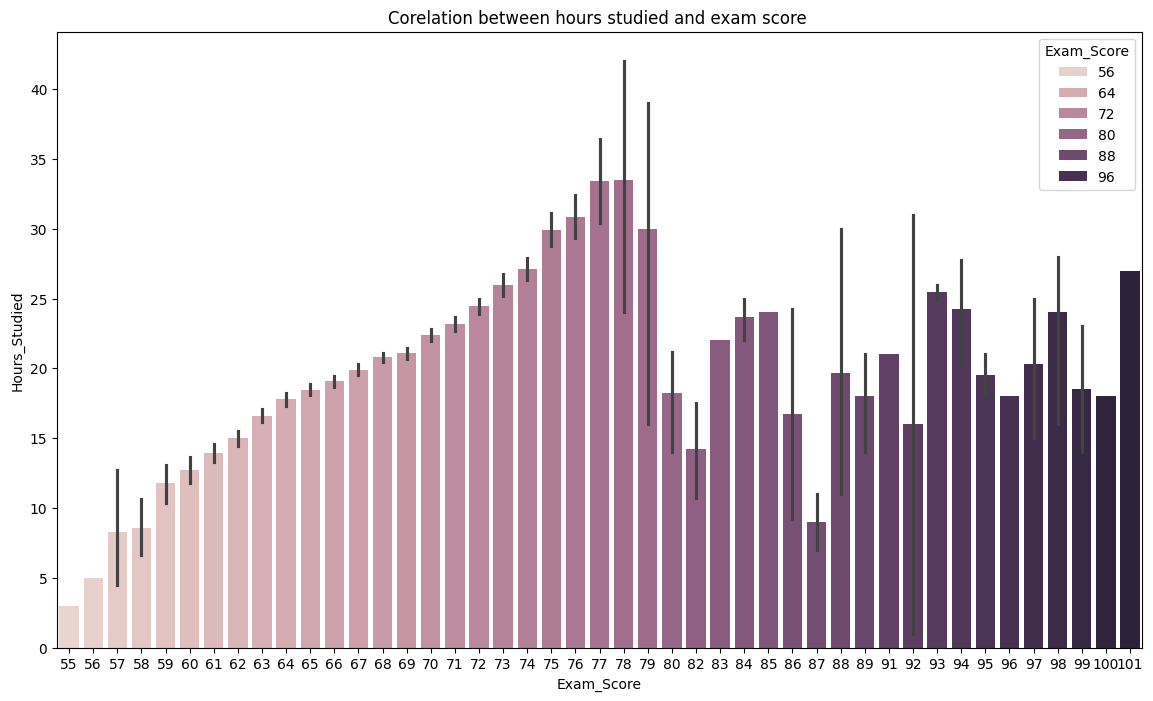

In [ ]:
data = pd.read_csv("/content/sample_data/student.csv.zip")
plt.figure(figsize = (14,8))
sn.barplot(data= data , x="Exam_Score", y="Hours_Studied",hue = "Exam_Score")
plt.title("Corelation between hours studied and exam score ")
plt.show()

#2)Is there a significant relationship between class attendance percentage and exam scores?

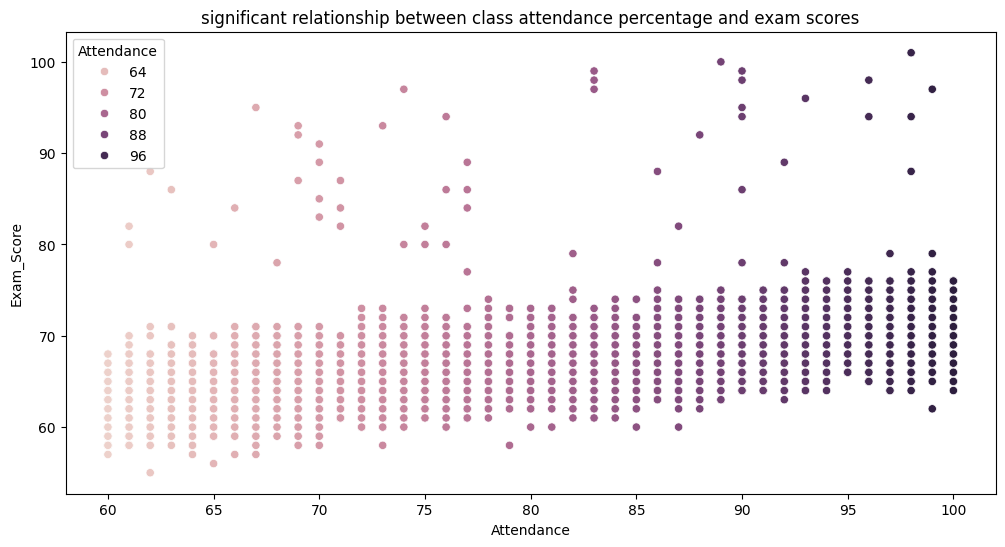

In [ ]:
#2)Is there a significant relationship between class attendance percentage and exam scores?
data = pd.read_csv("/content/sample_data/student.csv.zip")
plt.figure(figsize=(12,6))
sn.scatterplot(data= data , x="Attendance", y="Exam_Score",hue = "Attendance")
plt.title("significant relationship between class attendance percentage and exam scores")
plt.show()

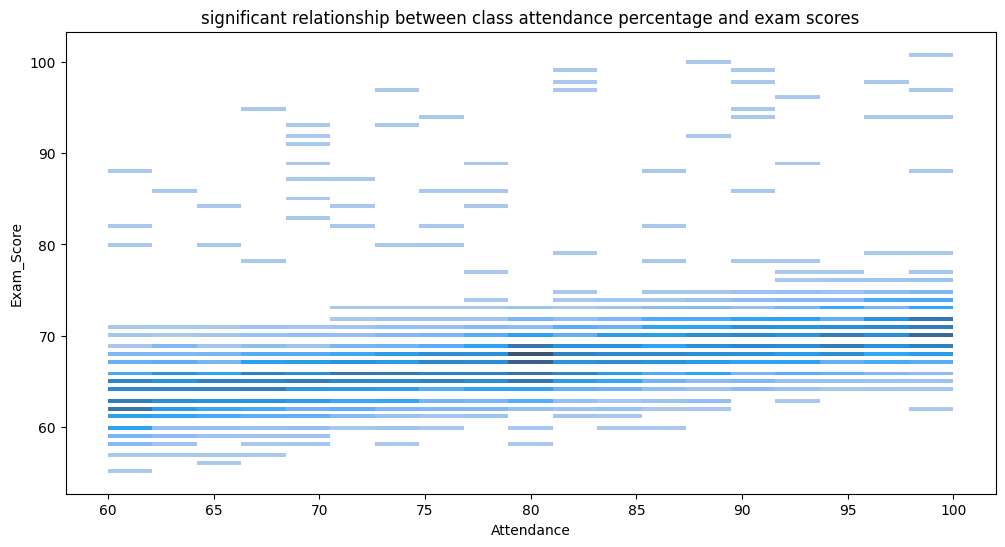

In [ ]:
plt.figure(figsize = (12,6))
sn.histplot(data = data,x="Attendance", y="Exam_Score")
plt.title("significant relationship between class attendance percentage and exam scores")
plt.show()

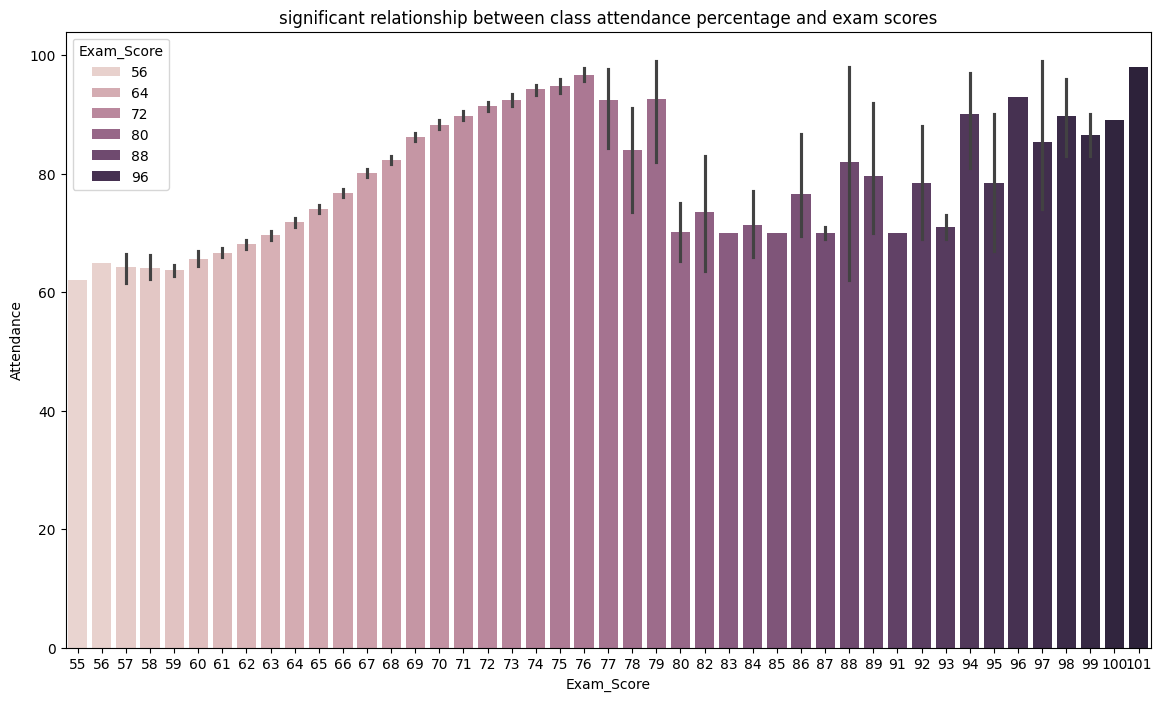

In [ ]:
plt.figure(figsize = (14,8))
sn.barplot(data= data , x="Exam_Score", y="Attendance",hue = "Exam_Score")
plt.title("significant relationship between class attendance percentage and exam scores")
plt.show()

#3) Does the average number of sleep hours per night influence exam performance?

In [ ]:
#3) Does the average number of sleep hours per night influence exam performance?
#Sleep_Hours,Exam_Score
data1 = pd.read_csv("/content/sample_data/student.csv.zip")
data2 = data1[["Sleep_Hours","Exam_Score"]].head()
data2.isnull().sum()
data3 = data2.groupby(["Sleep_Hours","Exam_Score"]).mean()
data3

Empty DataFrame
Columns: []
Index: [(6, 70), (7, 67), (7, 74), (8, 61), (8, 71)]

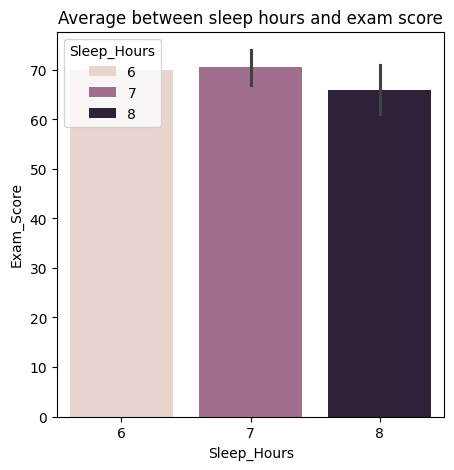

In [ ]:
plt.figure(figsize=(5,5))
sn.barplot(data = data3,x="Sleep_Hours",y="Exam_Score",hue = "Sleep_Hours")
plt.title("Average between sleep hours and exam score")
plt.show()

#4) How does family income and parental education level impact the student's exam scores?

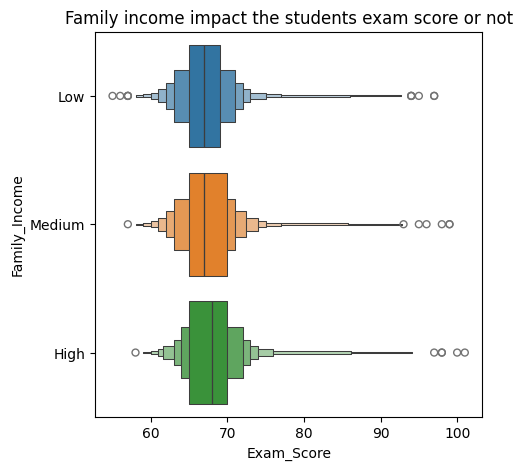

In [ ]:
#4) How does family income and parental education level impact the student's exam scores?
#Family_Income,Parental_Education_Level,Exam_Score

#-->a)Family income impact the students exam score or not

plt.figure(figsize = (5,5))
sn.boxenplot(data = data,y="Family_Income", x="Exam_Score",hue = "Family_Income")
plt.title("Family income impact the students exam score or not")
plt.show()

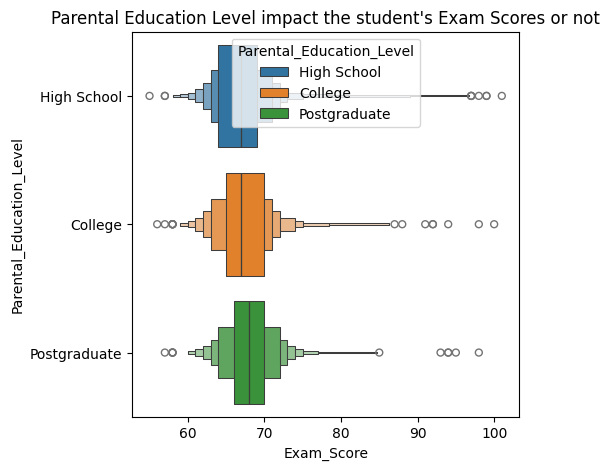

In [ ]:
#-->b)parental education level impact the student's exam scores or not

plt.figure(figsize = (5,5))
sn.boxenplot(data = data,y="Parental_Education_Level", x="Exam_Score",hue="Parental_Education_Level")
plt.title("Parental Education Level impact the student's Exam Scores or not")
plt.show()

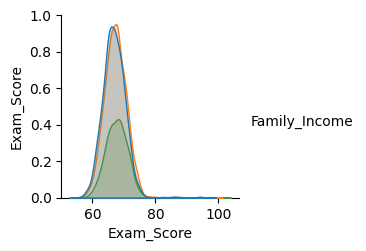

In [3]:
sn.pairplot(data[["Exam_Score","Family_Income","Parental_Education_Level"]],hue = "Family_Income")
plt.show()

#5)Do private school students perform better in exams than public school students?

In [17]:
#5)Do private school students perform better in exams than public school students?
#School_Type,	Exam_Score
df1 = pd.read_csv("/content/sample_data/student.csv.zip")
df2 = df1[["School_Type","Exam_Score"]]
df3 = df2[(df2["School_Type"]=="Public")]#&df2["School_Type"]=="Private"
df4 = df2["School_Type"].value_counts().reset_index(name = "counts")
df4



,School_Type,counts
0,Public,4598
1,Private,2009


In [21]:
df = data.groupby("School_Type")["Exam_Score"].sum().reset_index()
df

,School_Type,Exam_Score
0,Private,135181
1,Public,309045


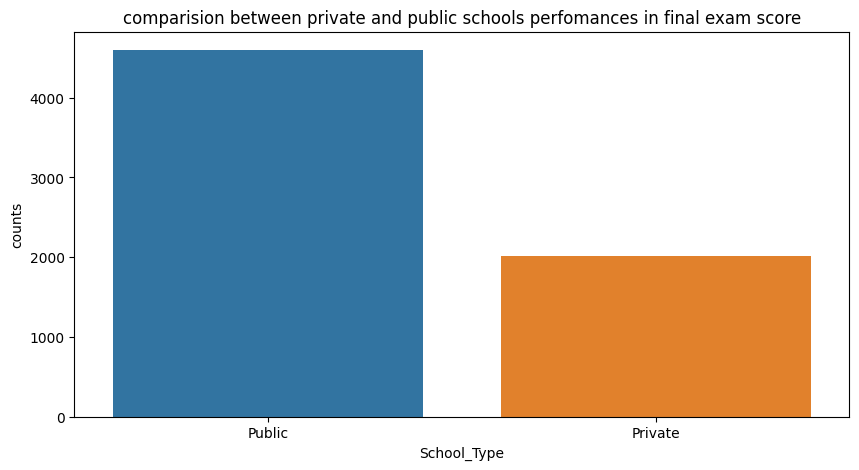

In [22]:
plt.figure(figsize = (10,5))
sn.barplot(df4,x = "School_Type",y = "counts",hue= "School_Type")
plt.title("comparision between private and public schools perfomances in final exam score")
plt.show()